In [1]:
!pip install koreanize_matplotlib

!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.5 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"

df = pd.read_json(url)[['title','label']]
df.head()

,title,label
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회
3,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회
4,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화


In [5]:
df.shape

(45678, 2)

In [6]:
df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [7]:
df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [8]:
df['label'].value_counts(normalize=True)

label
세계      0.182145
스포츠     0.169491
정치      0.161544
경제      0.133938
생활문화    0.125903
IT과학    0.114607
사회      0.112374
Name: proportion, dtype: float64

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.decomposition import LatentDirichletAllocation

In [10]:
tfidfvect = TfidfVectorizer(max_features=10000)
tfidfvect

TfidfVectorizer(max_features=10000)

In [11]:
dtm = tfidfvect.fit_transform(df['title'])
dtm

<45678x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 207106 stored elements in Compressed Sparse Row format>

In [12]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=tfidfvect.get_feature_names_out())
df_dtm.head()

,00,01,02,03,0원,10,100,1004,100gb,100개,...,히어로즈,힐러리,힐러리트럼프,힐링,힐만,힘든,힘으로,힘은,힘찬,女배구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': '연합뉴스 TF-IDF 가중치'}>

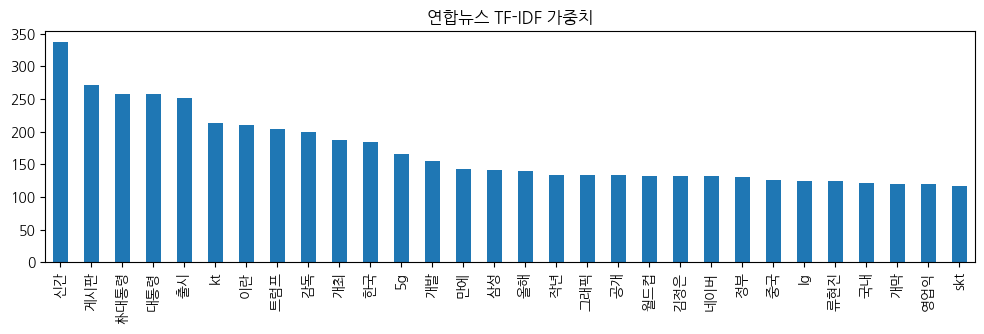

In [13]:
df_dtm.sum().nlargest(30).plot(kind="bar", figsize=(12,3), title="연합뉴스 TF-IDF 가중치")

In [14]:
# LDA : 토픽 모델링 - 토픽 개수(n_components), 알고리즘 계산 후 값들을 반환 (W,H 값 받아냄)
LDA_model = LatentDirichletAllocation(n_components=4, random_state=42)
W = LDA_model.fit_transform(df_dtm)
W

array([[0.08040377, 0.07474909, 0.07477409, 0.77007305],
       [0.74974973, 0.08341694, 0.08341746, 0.08341587],
       [0.74081993, 0.08966096, 0.0840381 , 0.08548101],
       ...,
       [0.07890673, 0.7628409 , 0.0791791 , 0.07907327],
       [0.07386249, 0.08105695, 0.07872093, 0.76635963],
       [0.0659067 , 0.06698397, 0.06627952, 0.80082981]])

- W : 원본문서와 토픽의 조합을 표현한 행렬

In [15]:
H = LDA_model.components_
H

array([[ 0.25025838,  0.25284922,  0.25016441, ...,  0.25232415,
         2.01979199,  0.25509657],
       [ 0.25288577,  6.52513656,  4.98724351, ...,  3.84648858,
         0.27824124, 11.40975374],
       [ 0.25167211,  0.2575939 ,  0.25171887, ...,  0.25074545,
         1.28586448,  0.25157975],
       [ 7.61977392,  0.25867522,  0.25462571, ...,  0.25430069,
         0.25311729,  0.30343786]])

- H : n_components(토픽의 수)에 지정된 행의 수를 가지며, 원본 문서의 dtm 의 열과 동일한 수의 열을 가짐

In [16]:
# 문서 개수(행)와 토픽(열)의 관련 퍼센트 판다스로 보기 좋게 정리(단어와 토픽의 관련도)
df_lda_w = pd.DataFrame(W)
df_lda_w

,0,1,2,3
0,0.080404,0.074749,0.074774,0.770073
1,0.749750,0.083417,0.083417,0.083416
2,0.740820,0.089661,0.084038,0.085481
3,0.079859,0.367688,0.474018,0.078434
4,0.092281,0.094523,0.719789,0.093407
...,...,...,...,...
45673,0.418467,0.244299,0.271514,0.065720
45674,0.083059,0.083711,0.084370,0.748859
45675,0.078907,0.762841,0.079179,0.079073
45676,0.073862,0.081057,0.078721,0.766360


In [17]:
df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [18]:
df_lda_w['title'] = df['title']
df_lda_w['label'] = df['label']
df_lda_w.head(15).style.background_gradient(axis=1)

,0,1,2,3,title,label
0,0.080404,0.074749,0.074774,0.770073,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,0.749750,0.083417,0.083417,0.083416,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,0.740820,0.089661,0.084038,0.085481,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회
3,0.079859,0.367688,0.474018,0.078434,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회
4,0.092281,0.094523,0.719789,0.093407,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화
5,0.740109,0.086521,0.088018,0.085353,야외서 생방송 하세요…액션캠 전용 요금제 잇따라,IT과학
6,0.092308,0.721797,0.093258,0.092637,월드컵 태극전사 16강 전초기지 레오강 입성종합,스포츠
7,0.688210,0.104093,0.103849,0.103848,미세먼지 속 출근길,생활문화
8,0.508610,0.095217,0.095259,0.300914,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,세계
9,0.281955,0.068602,0.359064,0.290379,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,세계


In [19]:
df_lda_topic = pd.DataFrame(H, columns=tfidfvect.get_feature_names_out())
df_lda_topic

,00,01,02,03,0원,10,100,1004,100gb,100개,...,히어로즈,힐러리,힐러리트럼프,힐링,힐만,힘든,힘으로,힘은,힘찬,女배구
0,0.250258,0.252849,0.250164,0.250173,3.776987,22.964080,4.713724,3.270361,2.673886,0.262612,...,0.253662,0.688217,0.251897,0.255538,0.250766,0.252917,0.255196,0.252324,2.019792,0.255097
1,0.252886,6.525137,4.987244,5.474805,0.258325,7.409215,3.888970,0.250150,0.250135,0.253478,...,2.562597,17.623393,0.252237,3.856348,5.077844,0.262424,0.250819,3.846489,0.278241,11.409754
2,0.251672,0.257594,0.251719,0.255903,0.610731,8.923377,9.743113,0.250154,0.250860,3.286097,...,0.252812,14.072202,0.252020,0.250219,0.253122,0.253951,3.874850,0.250745,1.285864,0.251580
3,7.619774,0.258675,0.254626,0.251199,0.260483,9.444741,0.256280,0.250147,0.251222,0.254556,...,4.548382,12.502649,7.081619,0.252351,4.355415,4.407188,1.876453,0.254301,0.253117,0.303438


In [20]:
# 5번 topic을 기준으로 상위 키워드

df_lda_topic.loc[2].nlargest(30)

영업익     119.935893
증가       99.139157
작년       96.352077
결정       96.118722
감소       78.130197
코스피      75.909261
터키       74.267949
특징주      74.041351
감독       66.852355
사장       61.814442
1분기      61.645466
여자농구     61.406822
2분기      59.787107
하락       59.094533
상승       56.881833
네이버      55.482698
만에       53.204163
의혹       52.882580
kbs      51.354840
정부       50.193255
프랑스      48.655735
3분기      46.732171
규모       46.363603
출간       46.324352
skt      46.067685
금리       45.570562
영업이익     45.513712
mou      43.230517
개발       43.070669
5g       42.876874
Name: 2, dtype: float64

In [21]:
def plot_top_words(model, feature_names, n_top_words, title, n_topics=5):
  df_topic = pd.DataFrame(model.components_, columns = feature_names)

  fig,axes = plt.subplots(1, n_topics, figsize = (6 * n_topics, 15), sharex=True)
  axes = axes.flatten()

  for topic_idx in df_lda_topic.index:
    ax = axes[topic_idx]
    df_topic.loc[topic_idx].nlargest(n_top_words).plot.barh(ax=ax)
    ax.invert_yaxis()
    ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize":20})
    ax.tick_params(axis="both", which="major", labelsize=15)
    for i in "top right".split():
      ax.spines[i].set_visible(False)

    fig.suptitle(title, fontsize=30)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

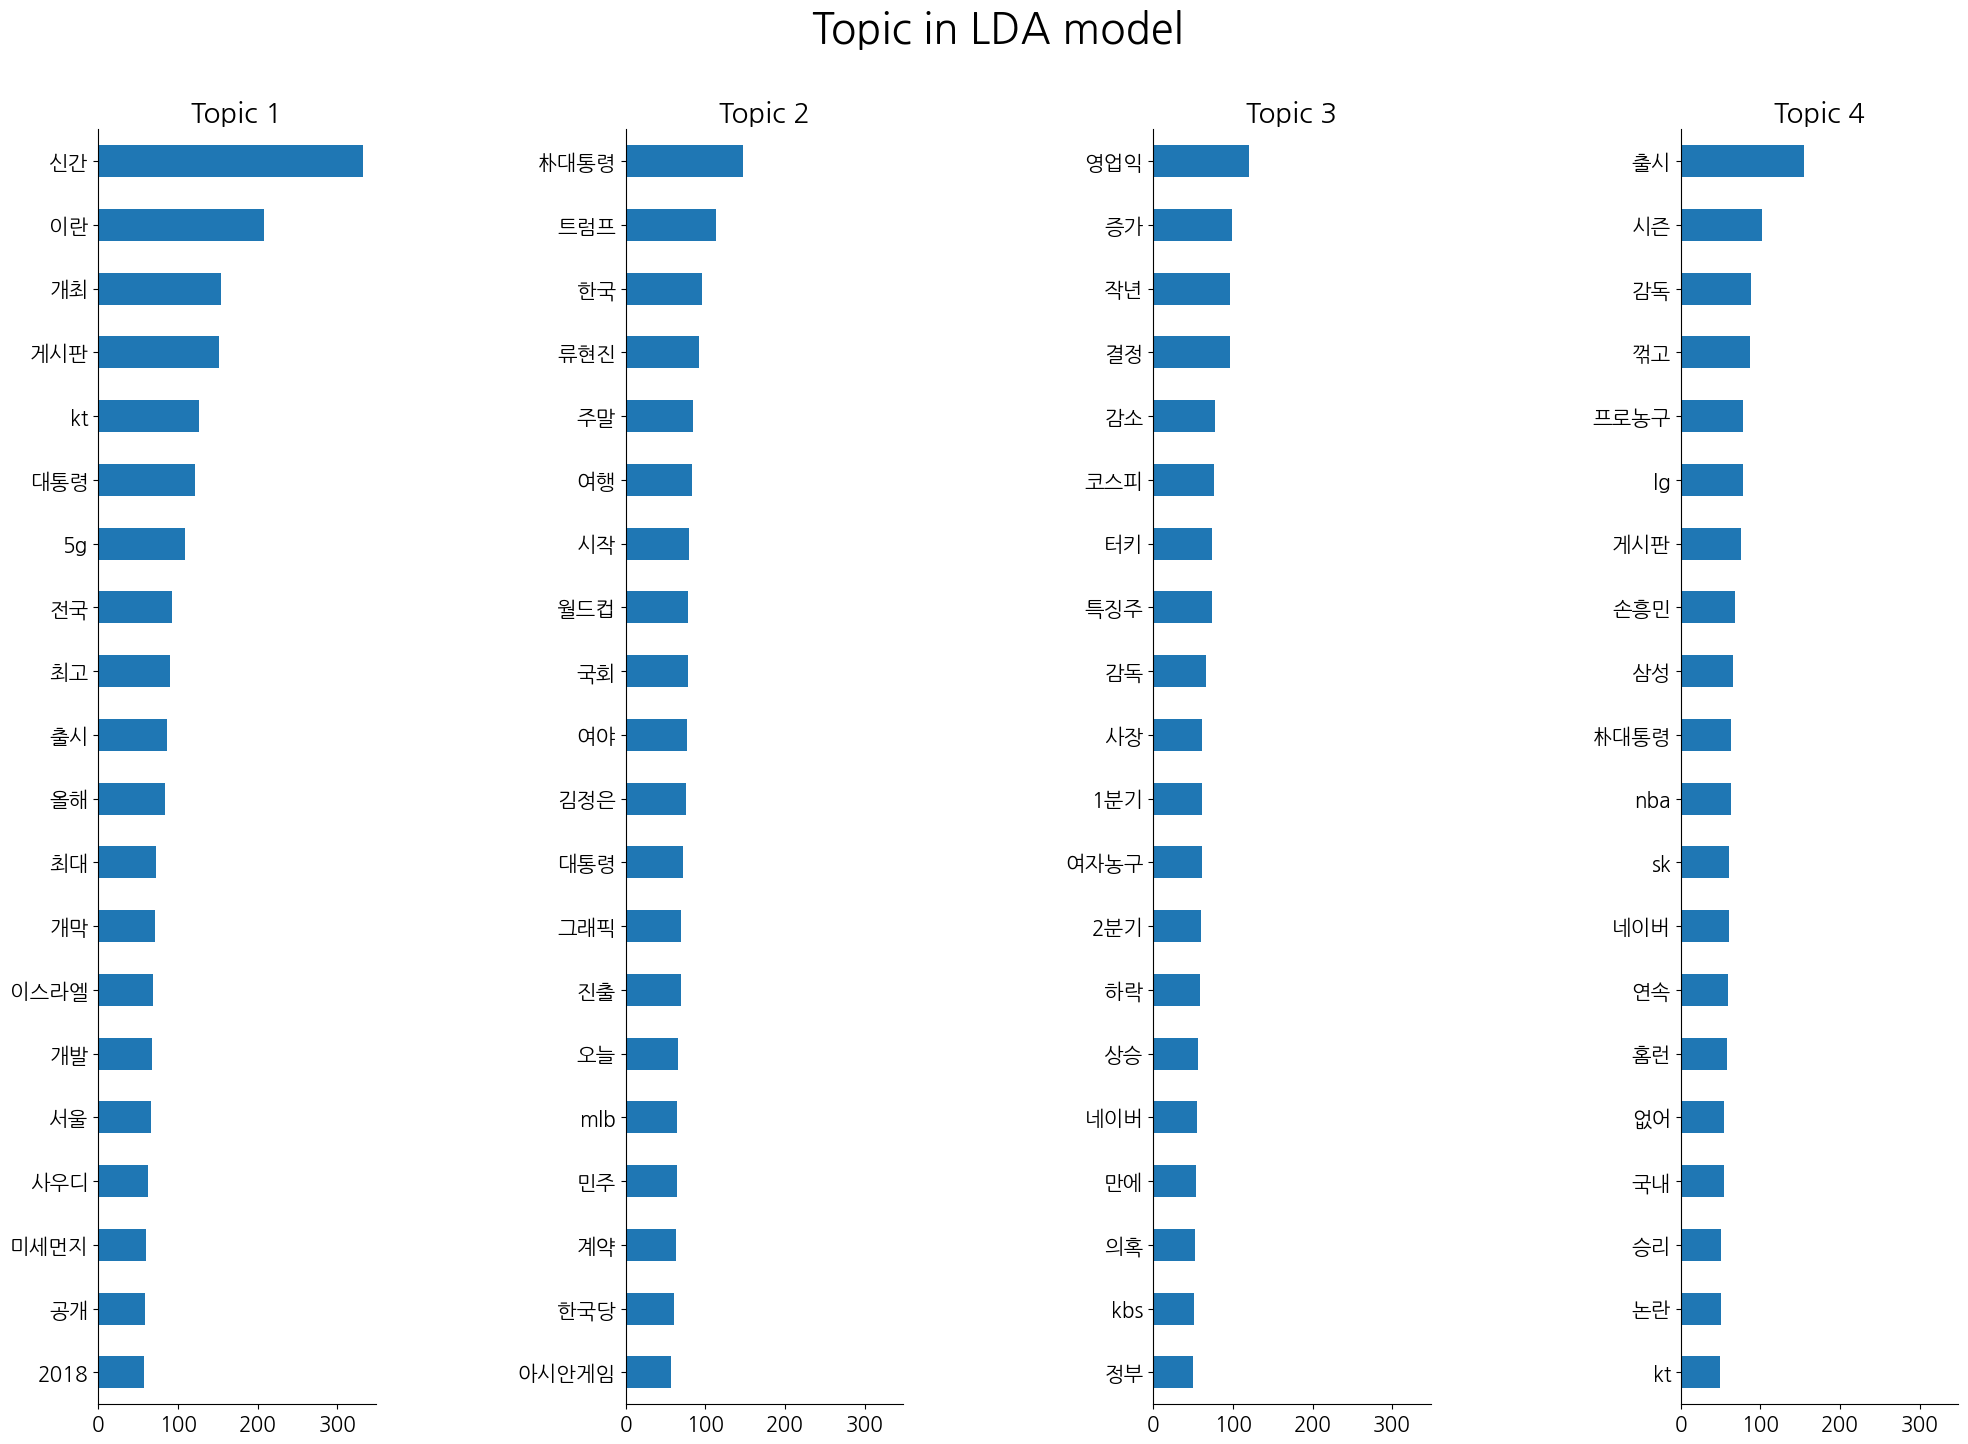

In [22]:
n_top_words = 20
plot_top_words(LDA_model, tfidfvect.get_feature_names_out(), n_top_words, "Topic in LDA model", n_topics=4)

### NMF(Non Negative Matrix Factorization) 토픽모델링
- 행렬 분해 기법
https://scikit-learn.org/stable/


In [23]:
# W : 원본 데이터 X(df_dtm) 의 각 행이 어떻게 H의 각 행(또는 특성-토픽)의 조합으로 표현될 수 있는지를 나타냄
# H : n_components 에 지정된 수의 행을 가지며, 원본 데이터 X의 열과 동일한 수의 열을 가짐
#     원본 데이터 X의 열(특성)을 새로운 축소된 차원의 특성으로 표현한 것

from sklearn.decomposition import NMF

# 토픽의 수
n_components = 4

nmf_model = NMF(n_components=n_components, random_state=42)
W = nmf_model.fit_transform(df_dtm)

In [24]:
W.shape

(45678, 4)

In [25]:
H = nmf_model.components_
H.shape

(4, 10000)

In [26]:
df_nmf_w = pd.DataFrame(W)
df_nmf_w['title'] = df['title']
df_nmf_w['label'] = df['label']
df_nmf_w.head(20).style.background_gradient(axis=1)

#  '생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'

,0,1,2,3,title,label
0,0.000084,0.008960,0.001334,0.000841,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,0.000000,0.000104,0.000051,0.000043,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,0.000003,0.000503,0.000734,0.000671,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회
3,0.000080,0.001976,0.000845,0.002568,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회
4,0.000242,0.001382,0.000087,0.000277,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화
5,0.000000,0.007193,0.000000,0.000088,야외서 생방송 하세요…액션캠 전용 요금제 잇따라,IT과학
6,0.000096,0.001977,0.000835,0.002506,월드컵 태극전사 16강 전초기지 레오강 입성종합,스포츠
7,0.000001,0.001302,0.000656,0.000307,미세먼지 속 출근길,생활문화
8,0.000001,0.000004,0.000664,0.001711,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,세계
9,0.000220,0.002104,0.003225,0.001366,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,세계


In [27]:
df_nmf_w[df_nmf_w['label'] == '세계'].head(20).style.background_gradient(axis=1)

,0,1,2,3,title,label
8,0.000001,0.000004,0.000664,0.001711,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,세계
9,0.000220,0.002104,0.003225,0.001366,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,세계
10,0.000245,0.001481,0.001422,0.002627,그리스서 한국전 참전 기념식…참전용사 한반도 평화 기원,세계
12,0.000000,0.002222,0.002468,0.004168,美 베네수엘라 구호품 반입 촉구 안보리 결의 추진,세계
18,0.000014,0.001486,0.000353,0.000903,파키스탄 경제난 속 카타르서 30억 달러 투자 유치,세계
19,0.000351,0.002495,0.000765,0.002327,일본 예산팽창에 재정건전성 우려…내년에 장기채무 GDP 2배,세계
20,0.000102,0.001661,0.000272,0.002960,칠레 민중가수 살해하고 미국 도피 전 군인 법정에 선다,세계
21,0.000256,0.000252,0.000055,0.000138,日 온라인으로 중국인 비자신청 받는다,세계
22,0.000672,0.000342,0.000130,0.000329,미 동부 마비시킨 악성 파일 국내서도 발견,세계
32,0.000010,0.000066,0.000061,0.000264,日경제산업상 경제보복 비판여론에 언론이 제대로 이해못해,세계


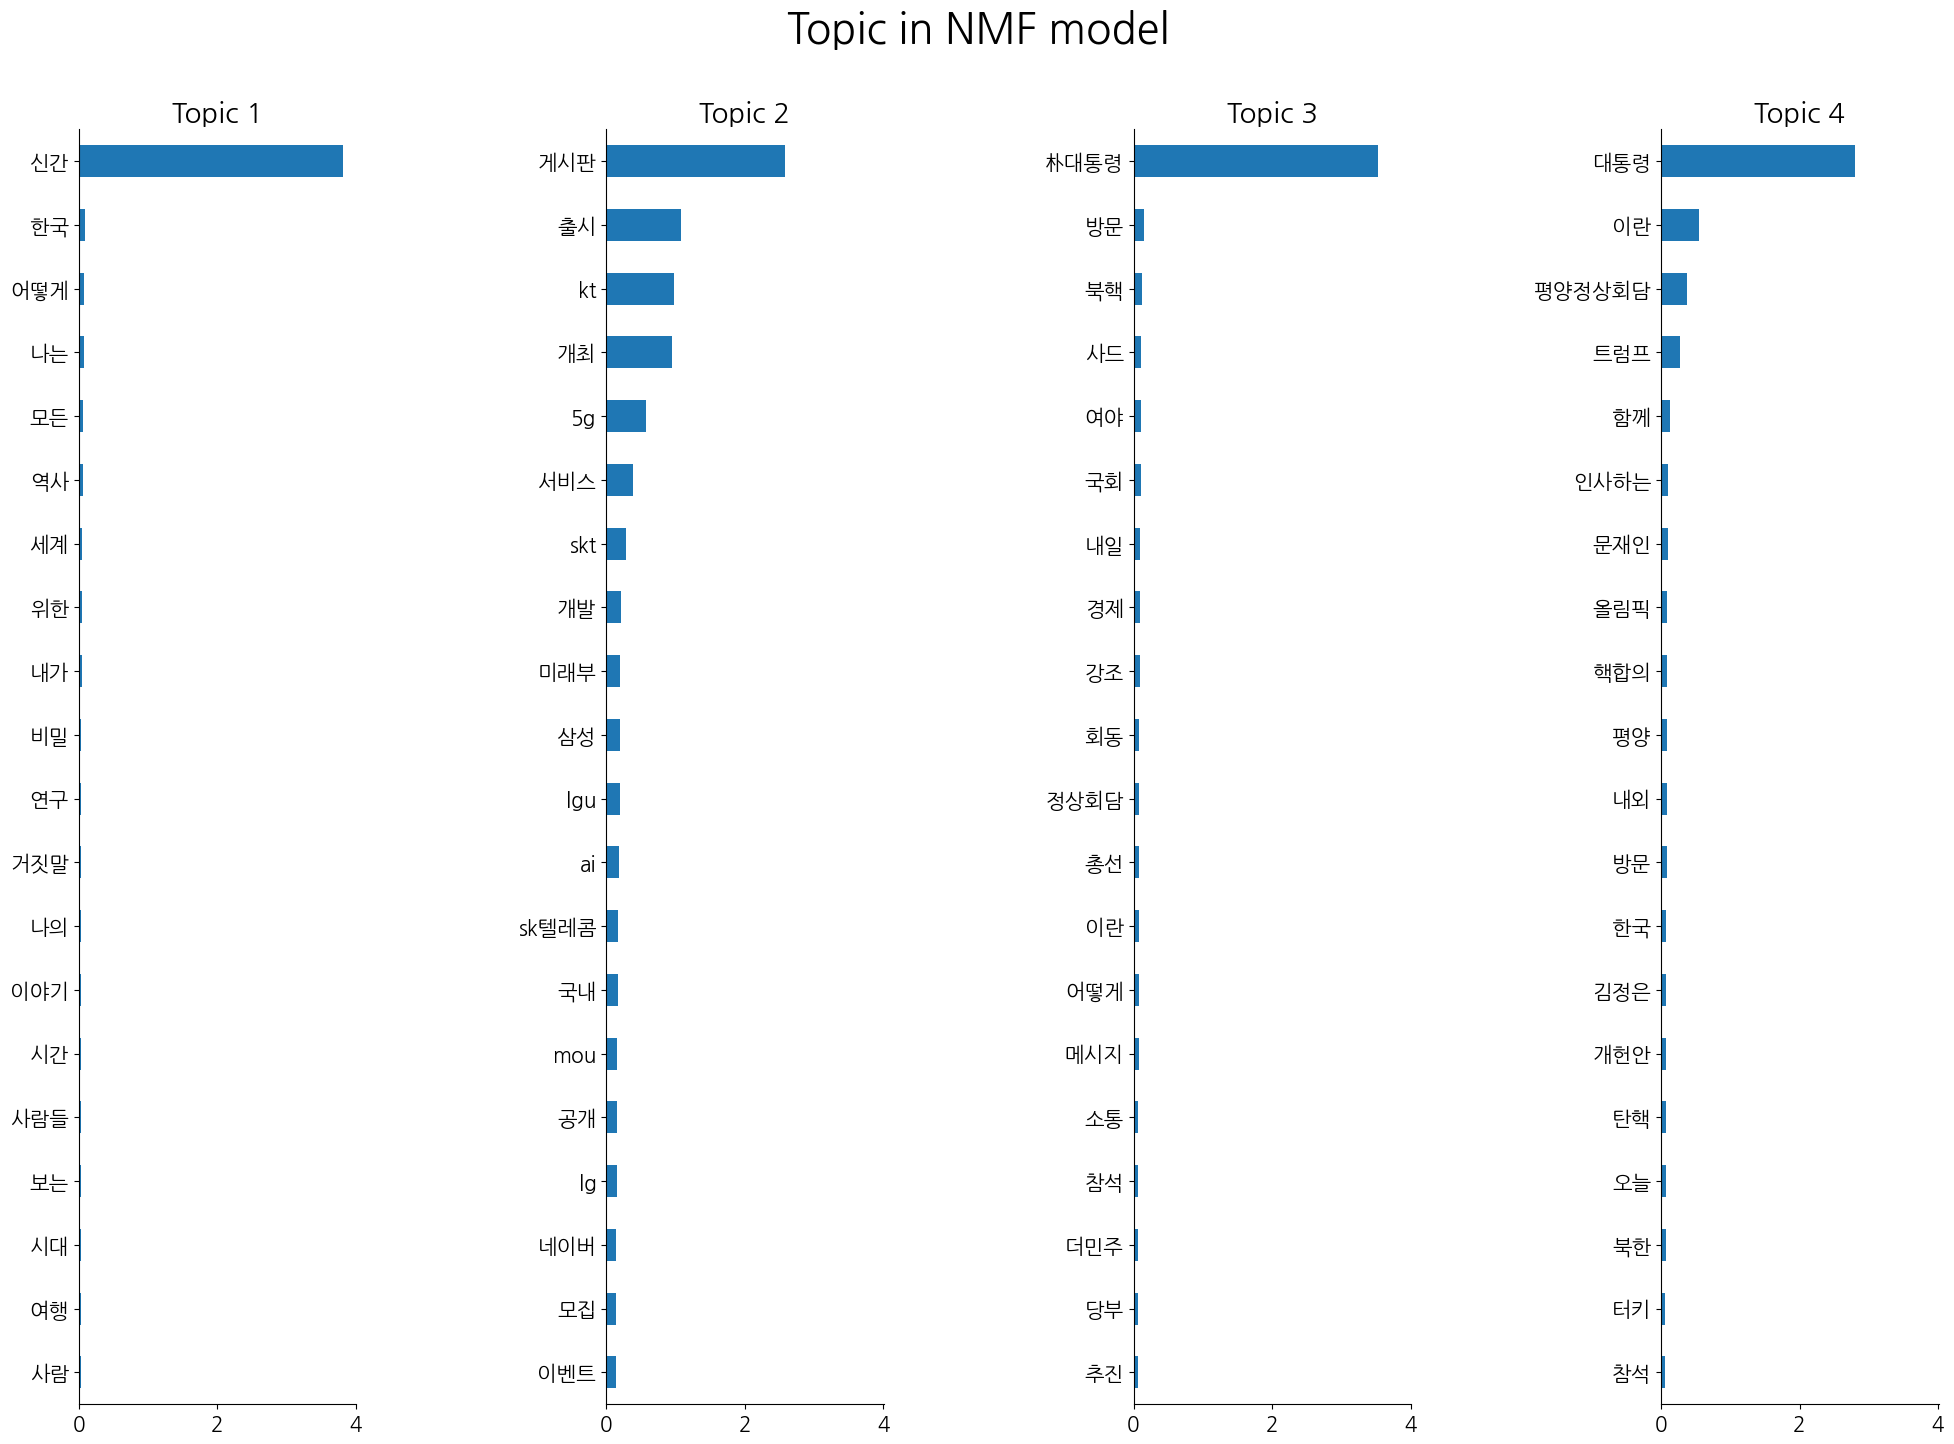

In [28]:
plot_top_words(nmf_model, tfidfvect.get_feature_names_out(), n_top_words, "Topic in NMF model", n_topics=4)

### 토픽별 워드 클라우드

In [29]:
from wordcloud import WordCloud

font_path = r"/Library/Fonts/NanumGothic.ttf"

def draw_wordclouds(topic_words, topic_idx, font_path=font_path):
  wordcloud = WordCloud(width=800, height=400,
                        background_color="white",
                        font_path=font_path
                        ).generate_from_frequencies(topic_words)

  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f"Topic {topic_idx + 1}", fontsize=20)
  plt.axis("off")
  plt.show()

In [30]:
df_nmf_h = pd.DataFrame(nmf_model.components_, columns=tfidfvect.get_feature_names_out())
df_nmf_h.head()

,00,01,02,03,0원,10,100,1004,100gb,100개,...,히어로즈,힐러리,힐러리트럼프,힐링,힐만,힘든,힘으로,힘은,힘찬,女배구
0,0.000107,0.000137,0.000035,0.000279,0.000000,0.000182,0.000076,0.000000,4.745383e-07,0.000017,...,0.000006,0.000220,5.143342e-07,0.000126,0.000110,0.000011,0.004447,0.000061,0.000030,0.000116
1,0.000619,0.002524,0.000257,0.000835,0.001485,0.022340,0.008298,0.002550,2.962397e-03,0.000602,...,0.001949,0.002578,2.388725e-04,0.000606,0.002186,0.000842,0.000753,0.000220,0.000136,0.001379
2,0.000209,0.000202,0.000128,0.000195,0.000030,0.002347,0.000614,0.000012,0.000000e+00,0.000229,...,0.000220,0.002329,3.263572e-04,0.000218,0.000789,0.000142,0.000150,0.000082,0.000000,0.000908
3,0.000547,0.000657,0.000284,0.000699,0.000080,0.011090,0.001515,0.000035,0.000000e+00,0.000287,...,0.000467,0.048025,4.775194e-04,0.000221,0.001635,0.000404,0.000218,0.000156,0.006483,0.002527


In [31]:
df_nmf_h.loc[0].to_dict()

{'00': 0.00010701977585680407,
 '01': 0.00013707662971746827,
 '02': 3.490581347746505e-05,
 '03': 0.00027919315553401466,
 '0원': 0.0,
 '10': 0.00018200505557406513,
 '100': 7.648918977567818e-05,
 '1004': 0.0,
 '100gb': 4.745383318984346e-07,
 '100개': 1.7044671738492563e-05,
 '100년': 0.008261696787226646,
 '100년전': 3.542565075556157e-05,
 '100대': 7.318148327532636e-05,
 '100만': 1.0046723291847614e-05,
 '100만대': 0.0,
 '100만명': 0.0,
 '100만원': 9.750359662047932e-05,
 '100명': 2.575964753964734e-05,
 '100배': 6.728203961715663e-06,
 '100번째': 2.63472184634094e-05,
 '100세시대': 0.0,
 '100억원': 0.0,
 '100여명': 1.2666474825376004e-05,
 '100원': 0.0,
 '100일': 0.0,
 '100조원': 0.0,
 '100주년': 0.00015964186761026865,
 '10개': 7.794552225879722e-05,
 '10곳': 6.899361397176702e-06,
 '10기가': 4.968853040673702e-05,
 '10년': 0.0018463120680265877,
 '10년간': 1.9109334336999356e-05,
 '10년만에': 9.918666387977951e-05,
 '10대': 0.0001811595522926766,
 '10도': 3.438138344623978e-05,
 '10만': 1.1722048435389235e-05,
 '10만개':

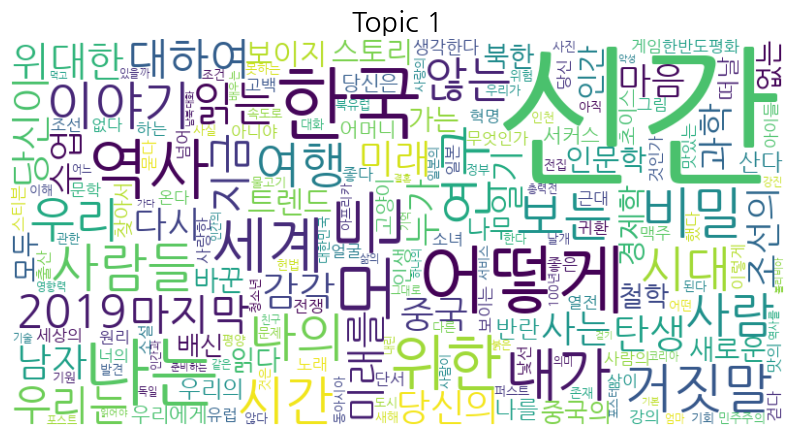

In [32]:
draw_wordclouds(df_nmf_h.loc[0].to_dict(), 0)

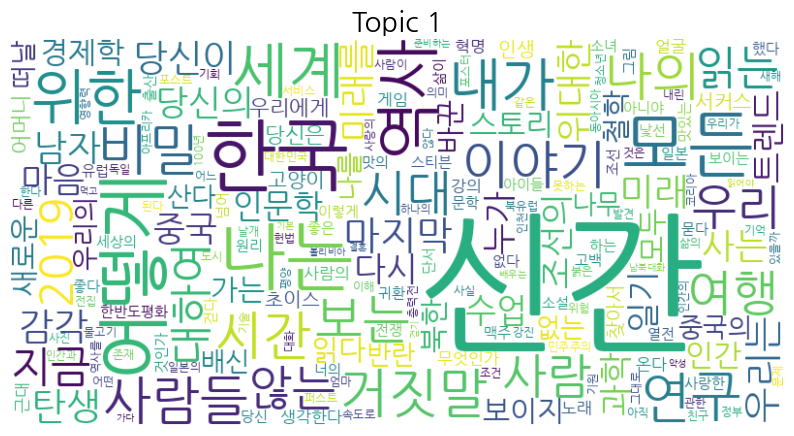

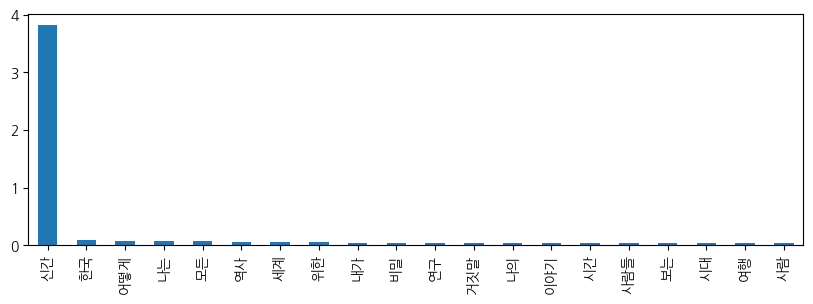

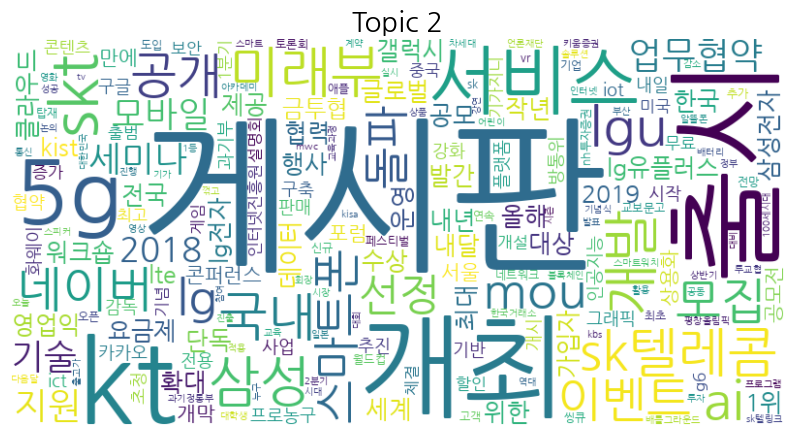

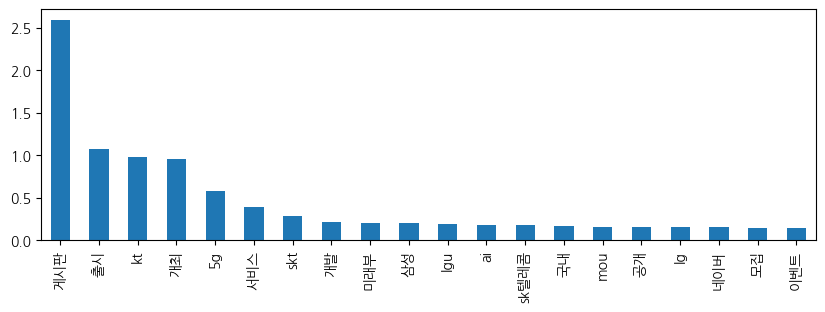

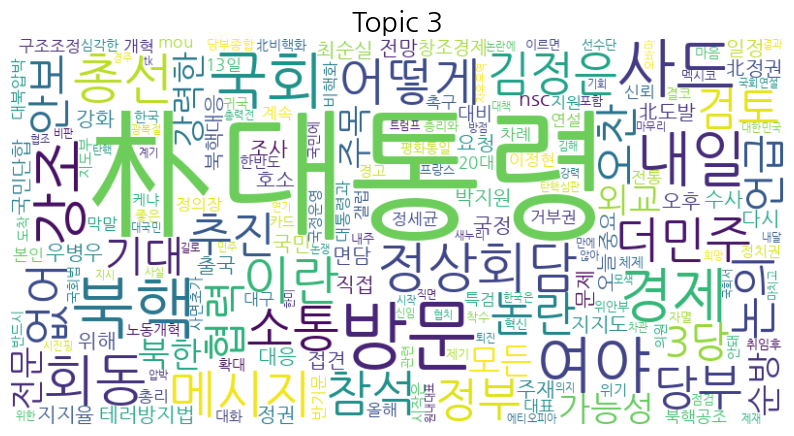

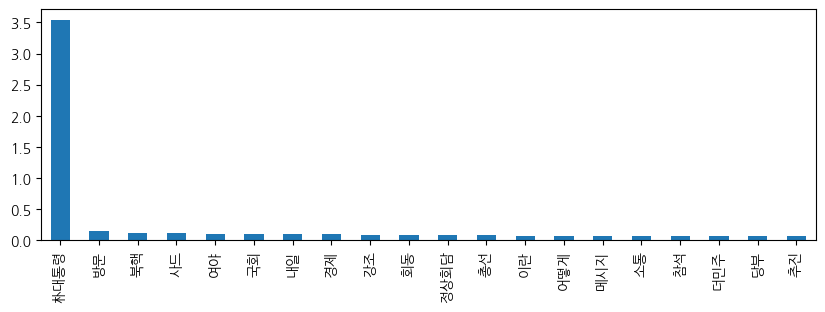

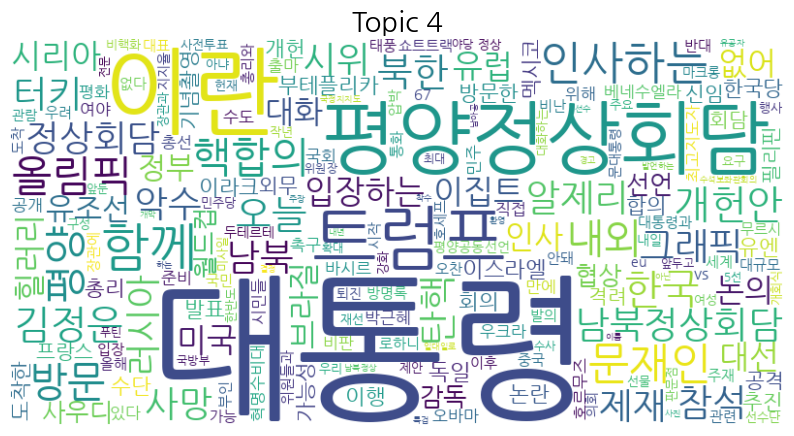

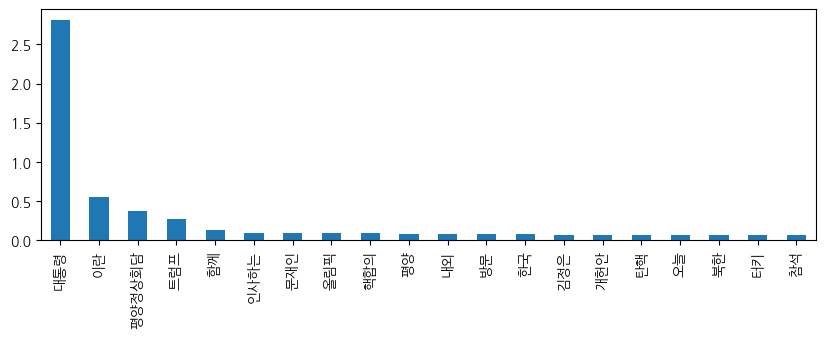

In [33]:
for topic_idx in range(n_components):
  draw_wordclouds(df_nmf_h.loc[topic_idx].to_dict(), topic_idx)
  df_nmf_h.loc[topic_idx].nlargest(20).plot(kind="bar", figsize=(10,3))